In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('/content/car reviews.csv', header= 0,
                        encoding= 'unicode_escape')


In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,Reviews,Sentiment
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1,Exterior: Beautiful Look from front and back b...,Positive
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1,Good car but style is old and fuel economy is ...,Positive
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1,Good car but style is old and fuel economy is ...,Positive
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1,After doing a lot of research in the market fo...,Negative
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1,Stylish exterior. Body is more stronger than a...,Neutral


In [ ]:
df.shape

(201, 31)

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
Reviews              0
Sentiment            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

FINDING THE CORRELATION BETWEEN ATTRIBUTES

In [ ]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


POSITIVE CORRELATION - BORE AND HORSE POWER
NEGATIVE CORRELATION - COMPRESSION RATIO AND HORSEPOWER
NEUTRAL CORRELATION - STROKE AND HORSEPOWER

Text(0.5, 1.0, 'Correlation Matrix: engine-size X price')

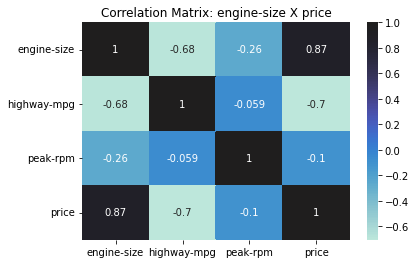

In [ ]:
sns.heatmap(df[['engine-size', 'highway-mpg', 'peak-rpm', 'price']].corr(), annot=True, center=1)
#plt.subplot(2, 1, 1)
plt.title('Correlation Matrix: engine-size X price')

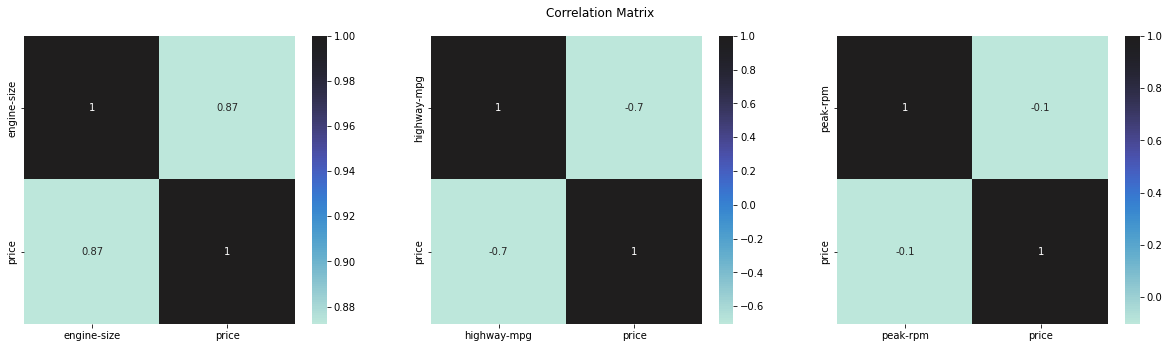

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
#fig.tight_layout()
fig.suptitle('Correlation Matrix')
sns.heatmap(df[['engine-size', 'price']].corr(), annot=True, ax=ax1, center=1)
sns.heatmap(df[['highway-mpg', 'price']].corr(), annot=True, ax=ax2, center=1)
sns.heatmap(df[['peak-rpm', 'price']].corr(), annot=True, ax=ax3, center=1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9,
                    wspace=0.2, 
                    hspace=0.2)


Text(0.5, 6.79999999999999, 'body-style')

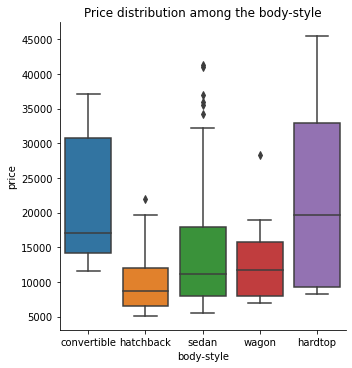

In [ ]:
#sns.catplot(data=df['body-style', 'engine-location', 'drive-wheels', 'price'], x='city', y='price', kind='box')
sns.catplot(data=df, x='body-style', y='price', kind='box')
plt.title('Price distribution among the body-style')
plt.ylabel('price')
plt.xlabel('body-style')

Text(0.5, 6.79999999999999, 'drive-wheels')

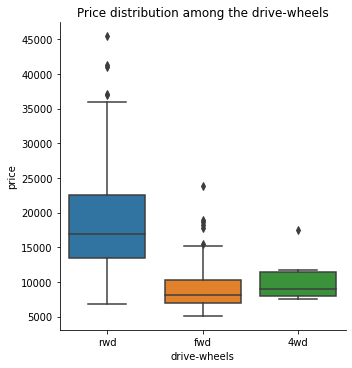

In [ ]:
#sns.catplot(data=df['body-style', 'engine-location', 'drive-wheels', 'price'], x='city', y='price', kind='box')
sns.catplot(data=df, x='drive-wheels', y='price', kind='box')
plt.title('Price distribution among the drive-wheels')
plt.ylabel('price')
plt.xlabel('drive-wheels')

Text(0.5, 6.79999999999999, 'engine-location')

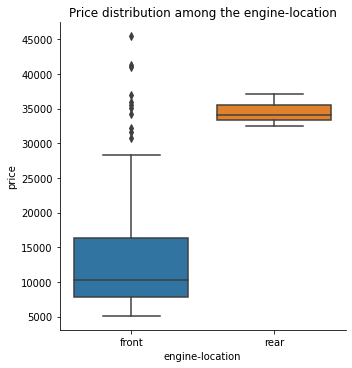

In [ ]:
#sns.catplot(data=df['body-style', 'engine-location', 'drive-wheels', 'price'], x='city', y='price', kind='box')
sns.catplot(data=df, x='engine-location', y='price', kind='box')
plt.title('Price distribution among the engine-location')
plt.ylabel('price')
plt.xlabel('engine-location')

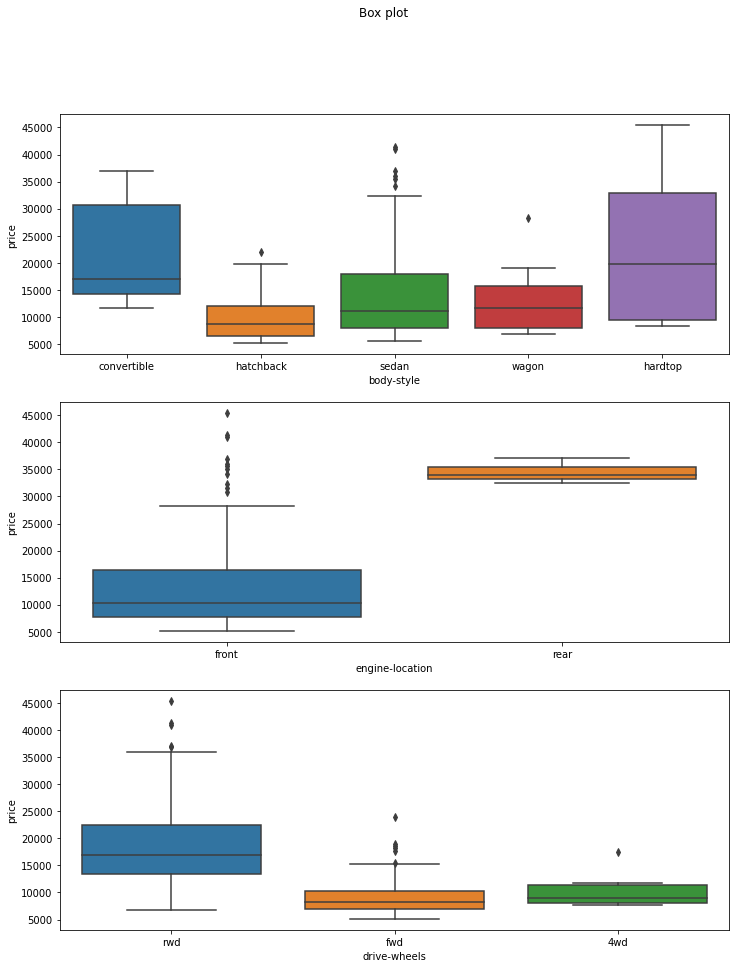

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,15))
#fig.tight_layout()
fig.suptitle('Box plot')
#sns.catplot(data=df['body-style', 'engine-location', 'drive-wheels', 'price'], x='city', y='price', kind='box')
sns.boxplot(data=df, x='body-style', y='price', ax=ax1)
sns.boxplot(data=df, x='engine-location', y='price', ax=ax2)
sns.boxplot(data=df, x='drive-wheels', y='price', ax=ax3)

In [ ]:
# Find the continuous variables features from the datasets
cont_vars = df.select_dtypes("int64", "float64").columns.to_list()
cont_vars # print all the continuous variable features from the dataset

['symboling',
 'normalized-losses',
 'curb-weight',
 'engine-size',
 'city-mpg',
 'highway-mpg',
 'price',
 'diesel',
 'gas']

In [ ]:
# display the data present in the identified features
df[cont_vars]

,symboling,normalized-losses,curb-weight,engine-size,city-mpg,highway-mpg,price,diesel,gas
0,3,122,2548,130,21,27,13495,0,1
1,3,122,2548,130,21,27,16500,0,1
2,1,122,2823,152,19,26,16500,0,1
3,2,164,2337,109,24,30,13950,0,1
4,2,164,2824,136,18,22,17450,0,1
...,...,...,...,...,...,...,...,...,...
196,-1,95,2952,141,23,28,16845,0,1
197,-1,95,3049,141,19,25,19045,0,1
198,-1,95,3012,173,18,23,21485,0,1
199,-1,95,3217,145,26,27,22470,1,0


In [ ]:
# describe the standard five point summary of the identified features
df[cont_vars].describe()

,symboling,normalized-losses,curb-weight,engine-size,city-mpg,highway-mpg,price,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,2555.666667,126.875622,25.179104,30.686567,13207.129353,0.099502,0.900498
std,1.254802,31.99625,517.296727,41.546834,6.423220,6.815150,7947.066342,0.300083,0.300083
min,-2.000000,65.00000,1488.000000,61.000000,13.000000,16.000000,5118.000000,0.000000,0.000000
25%,0.000000,101.00000,2169.000000,98.000000,19.000000,25.000000,7775.000000,0.000000,1.000000
50%,1.000000,122.00000,2414.000000,120.000000,24.000000,30.000000,10295.000000,0.000000,1.000000
75%,2.000000,137.00000,2926.000000,141.000000,30.000000,34.000000,16500.000000,0.000000,1.000000
max,3.000000,256.00000,4066.000000,326.000000,49.000000,54.000000,45400.000000,1.000000,1.000000


In [ ]:
# Get the unique values of each identified columns
[print("Column Name = {} and Unique Values = {}".format(col, df[col].unique())) for col in cont_vars]

Column Name = symboling and Unique Values = [ 3  1  2  0 -1 -2]
Column Name = normalized-losses and Unique Values = [122 164 158 192 188 121  98  81 118 148 110 145 137 101  78 106  85 107
 104 113 150 129 115  93 142 161 153 125 128 103 168 108 194 231 119 154
  74 186  83 102  89  87  77  91 134  65 197  90  94 256  95]
Column Name = curb-weight and Unique Values = [2548 2823 2337 2824 2507 2844 2954 3086 2395 2710 2765 3055 3230 3380
 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819 1837
 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950 1890
 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515 3750
 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328 2833
 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008 2324
 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485 3130
 2818 2778 2756 2800 2579 2460 2658 2695 2707 2758 2808 2847 2050 2120
 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280 3

[None, None, None, None, None, None, None, None, None]

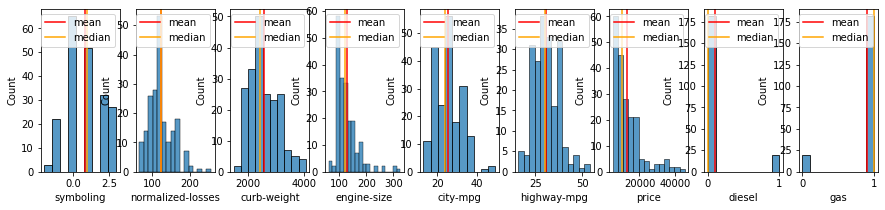

In [ ]:
# Plot the histogram to find the continuous variable distribution
#grid = plt.GridSpec(2, 4, wspace = .25, hspace = .25, ncols=2, nrows=4, constrained_layout=True)
fig, ax = plt.subplots(1,len(cont_vars), figsize=(15,3))

def plot_hist(cont_feat, ax_index):
    #plt.subplot(3,3,ax_index+1)
    sns.histplot(df[cont_feat], kde = False, ax=ax[ax_index])
    ax[ax_index].axvline(x=np.mean(df[cont_feat]), color = 'red', label = 'mean')
    ax[ax_index].axvline(x=np.median(df[cont_feat]), color = 'orange', label = 'median')
    ax[ax_index].legend(loc='upper right')

for idx, feat1 in enumerate(cont_vars):
    plot_hist(feat1, idx)

In [ ]:
# Find the object type variable features from the datasets
obj_vars = df.select_dtypes('object').columns.to_list()
obj_vars # print all the object variable features from the dataset

['make',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'horsepower-binned',
 'Reviews',
 'Sentiment']

In [ ]:
# display the data present in the identified features
df[obj_vars]

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,Reviews,Sentiment
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,Exterior: Beautiful Look from front and back b...,Positive
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,Good car but style is old and fuel economy is ...,Positive
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium,Good car but style is old and fuel economy is ...,Positive
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium,After doing a lot of research in the market fo...,Negative
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium,Stylish exterior. Body is more stronger than a...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium,"Great car to drive ,first i owned a civic its ...",Positive
197,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High,"Fog Lights, Projection Headlamps, Retractable ...",Neutral
198,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium,Good pickup better than JDM models available i...,Positive
199,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium,Prince pearl is one of the best at less price ...,Positive


In [ ]:
# describe the standard five point summary of the identified features
df[obj_vars].describe()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,Reviews,Sentiment
count,201,201,201,201,201,201,201,201,201,200,201,201
unique,22,2,2,5,3,2,6,7,8,3,200,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low,Good car but style is old and fuel economy is ...,Positive
freq,32,165,115,94,118,198,145,157,92,115,2,109


In [ ]:
# Get the unique values of each identified columns
[print("Column Name = {} and Unique Values = {}".format(col, df[col].unique())) for col in obj_vars]

Column Name = make and Unique Values = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column Name = aspiration and Unique Values = ['std' 'turbo']
Column Name = num-of-doors and Unique Values = ['two' 'four']
Column Name = body-style and Unique Values = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column Name = drive-wheels and Unique Values = ['rwd' 'fwd' '4wd']
Column Name = engine-location and Unique Values = ['front' 'rear']
Column Name = engine-type and Unique Values = ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Column Name = num-of-cylinders and Unique Values = ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Column Name = fuel-system and Unique Values = ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Column Name = horsepower-binned and Unique Values = ['Medium' 'Low' 'High' nan]
Column Name =

[None, None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Manufacturers distribution in dataset')

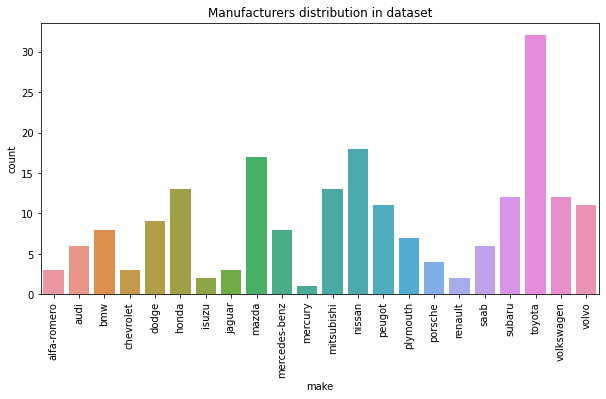

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='make', data=df)
plt.xticks(rotation='vertical')
plt.title('Manufacturers distribution in dataset')

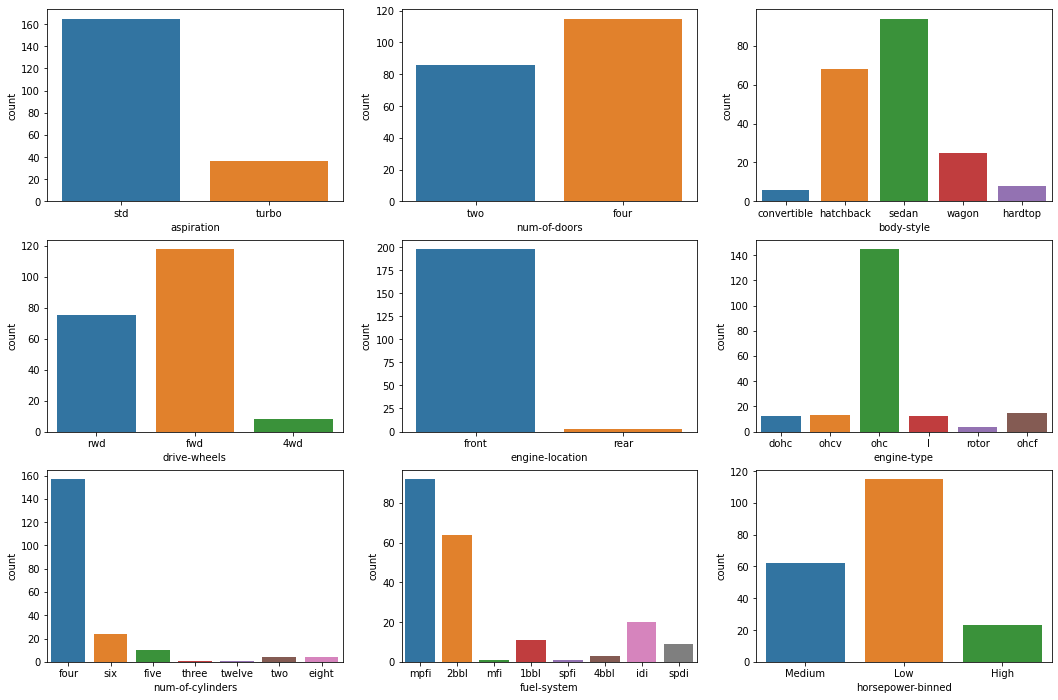

In [ ]:
# 
#def plot_count(obj_feat):
#    sns.catplot(x=obj_feat, data=df[obj_vars], kind='count', aspect=1)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(obj_vars[1:], axs.ravel()):
    if col == 'make':
        continue
    sns.countplot(x=col, data=df, ax=ax)

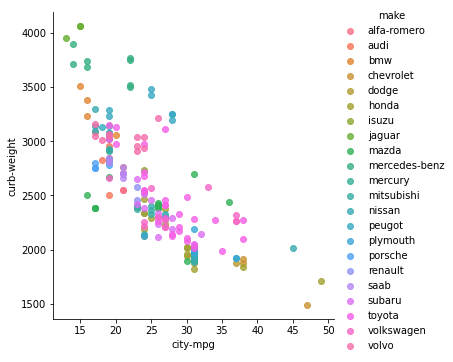

In [ ]:
sns.lmplot(x='city-mpg',y="curb-weight", data=df, hue="make", fit_reg=False)

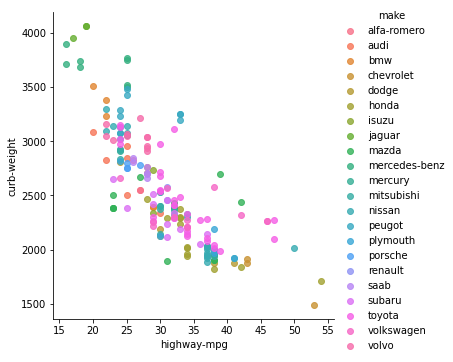

In [ ]:
sns.lmplot(x='highway-mpg',y="curb-weight", data=df, hue="make", fit_reg=False)

In [ ]:
df['Sentiment'].value_counts()

Positive    109
Neutral      49
Negative     43
Name: Sentiment, dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize


In [ ]:
df.shape


(201, 31)

In [ ]:
 import nltk
 nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,201):
    review = re.sub('[^a-zA-Z]', ' ',df['Reviews'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',df['Reviews'][i])
    review = re.sub('[^0-9a-z #+_♥️]', ' ',df['Reviews'][i])#Remove bad symbols
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)
corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['xterior eauti ook front back door handl also odi color good thing nterior nterior look cool inspir audi mg cd locat also attract drive rive smooth soft gear also smooth fuel averag 14 15 km within citi nterest featur 1 ower window control key 2 ack wiper 3 efogg 4 4 cylind engin 4 4 lloy wheel reat featur less price refer est ar 2021',
 'ood car style old fuel economi ok ut resel valu auto version awsom hy demand increas suddenli dont know uto car demand high compar suppli price old model 2009 peak owev far know new shape citi round corner expect lauch demand old model declin',
 'ood car style old fuel economi ok ut resel valu auto version awsom hy demand increas suddenli dont know uto car demand high compar suppli price old model 2009 peak owev far know new shape citi round corner expect lauch demand old model declin',
 'fter lot research market found within 2 million bracket new apanes hatchback avail opt picanto design futurist car comfort drive erform fine keep view 1000cc gear s

In [ ]:
words = []
Sentiment_Polarity=[]
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
    Sentiment_Polarity.append
words

['xterior',
 'eauti',
 'ook',
 'front',
 'back',
 'door',
 'handl',
 'also',
 'odi',
 'color',
 'good',
 'thing',
 'nterior',
 'nterior',
 'look',
 'cool',
 'inspir',
 'audi',
 'mg',
 'cd',
 'locat',
 'also',
 'attract',
 'drive',
 'rive',
 'smooth',
 'soft',
 'gear',
 'also',
 'smooth',
 'fuel',
 'averag',
 '14',
 '15',
 'km',
 'within',
 'citi',
 'nterest',
 'featur',
 '1',
 'ower',
 'window',
 'control',
 'key',
 '2',
 'ack',
 'wiper',
 '3',
 'efogg',
 '4',
 '4',
 'cylind',
 'engin',
 '4',
 '4',
 'lloy',
 'wheel',
 'reat',
 'featur',
 'less',
 'price',
 'refer',
 'est',
 'ar',
 '2021',
 'ood',
 'car',
 'style',
 'old',
 'fuel',
 'economi',
 'ok',
 'ut',
 'resel',
 'valu',
 'auto',
 'version',
 'awsom',
 'hy',
 'demand',
 'increas',
 'suddenli',
 'dont',
 'know',
 'uto',
 'car',
 'demand',
 'high',
 'compar',
 'suppli',
 'price',
 'old',
 'model',
 '2009',
 'peak',
 'owev',
 'far',
 'know',
 'new',
 'shape',
 'citi',
 'round',
 'corner',
 'expect',
 'lauch',
 'demand',
 'old',
 'mode

In [ ]:
from collections import Counter
words_counts = Counter(words)

In [ ]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


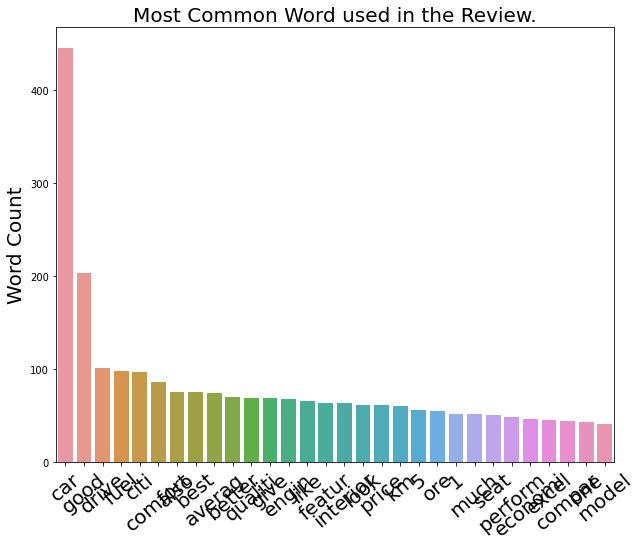

In [ ]:
plt.figure(figsize=(10,8))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.show()

In [ ]:
k = most_commmom_wordList[0:30]
Sentiment_Polarity=[]
Positive=[]
Neutral=[]
Negative=[]
for i in k:
    Sentiment=[]
    for z in corpus:
      
        if i in z and df['Sentiment'][corpus.index(z)]=='Positive':
            Positive.append(i)
        if i in z and df['Sentiment'][corpus.index(z)]=='Neutral':
            Neutral.append(i)
        if i in z and df['Sentiment'][corpus.index(z)]=='Negative':
            Negative.append(i)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


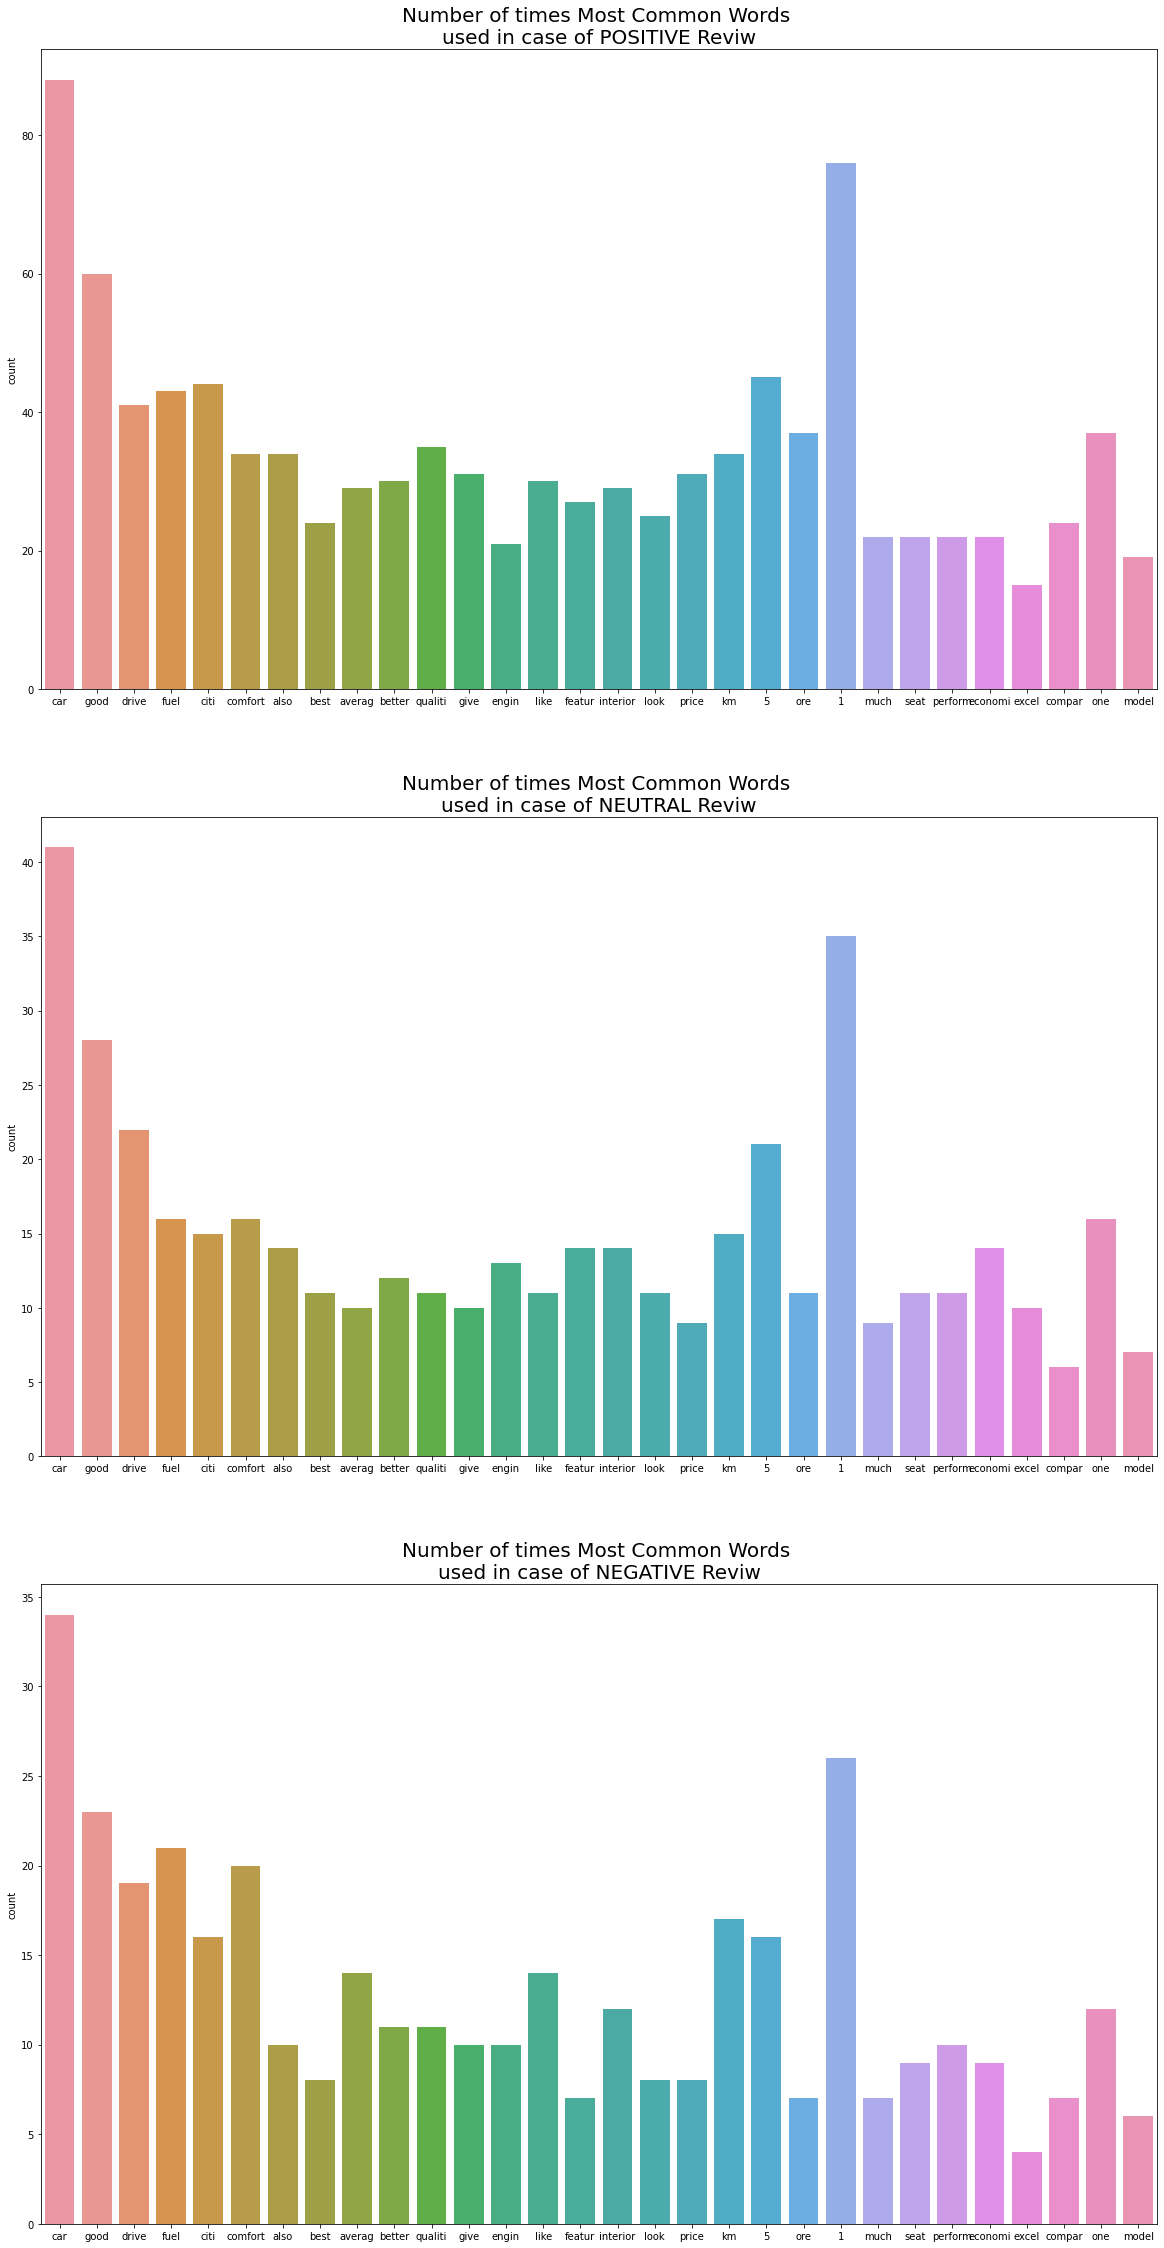

In [ ]:
f,ax = plt.subplots(3,1,figsize=(20,40))
c1 = sns.countplot(Positive, ax=ax[0])
c2 = sns.countplot(Neutral,ax=ax[1])
c3 = sns.countplot(Negative,ax=ax[2])
ax[0].set_title("Number of times Most Common Words \nused in case of POSITIVE Reviw",fontsize=20)
ax[1].set_title("Number of times Most Common Words \nused in case of NEUTRAL Reviw",fontsize=20)
ax[2].set_title("Number of times Most Common Words \nused in case of NEGATIVE Reviw",fontsize=20)
plt.show()